In [1]:
from PIL import Image
import pytesseract
import ipywidgets as widgets
from IPython.display import display
from io import BytesIO
from textblob import TextBlob
from transformers import pipeline
import re
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r"E:\Tesseract-OCR\tesseract.exe"

In [2]:
# Create an upload widget that accepts image files
uploader = widgets.FileUpload(
    accept="image/*",  # accept only image files
    multiple=True      # allow multiple uploads if needed
)

# Display the upload widget and an optional output area
out = widgets.Output()
display(uploader)
display(out)

# Define a simple upload handler (no predictions here)
def on_upload_change(change):
    """Triggered when files are uploaded — currently just logs file names."""
    with out:
        out.clear_output()
        for item in change.new:
            print(f"Uploaded file: {item.name}")

# Attach the handler to the widget
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Output()

Displaying: Screenshot 2025-10-14 171454.png


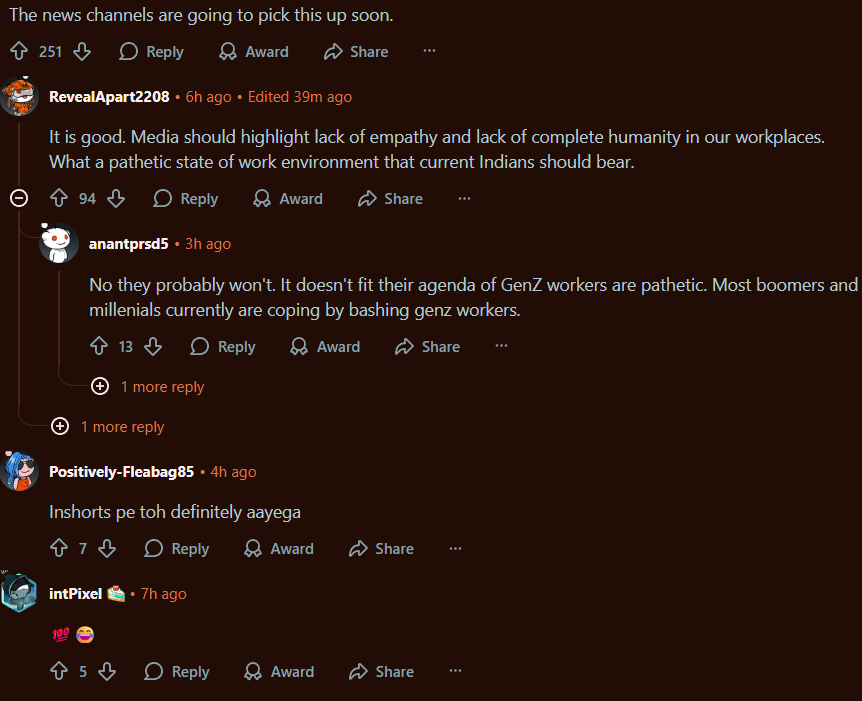

Displaying: Screenshot 2025-10-14 171946.png


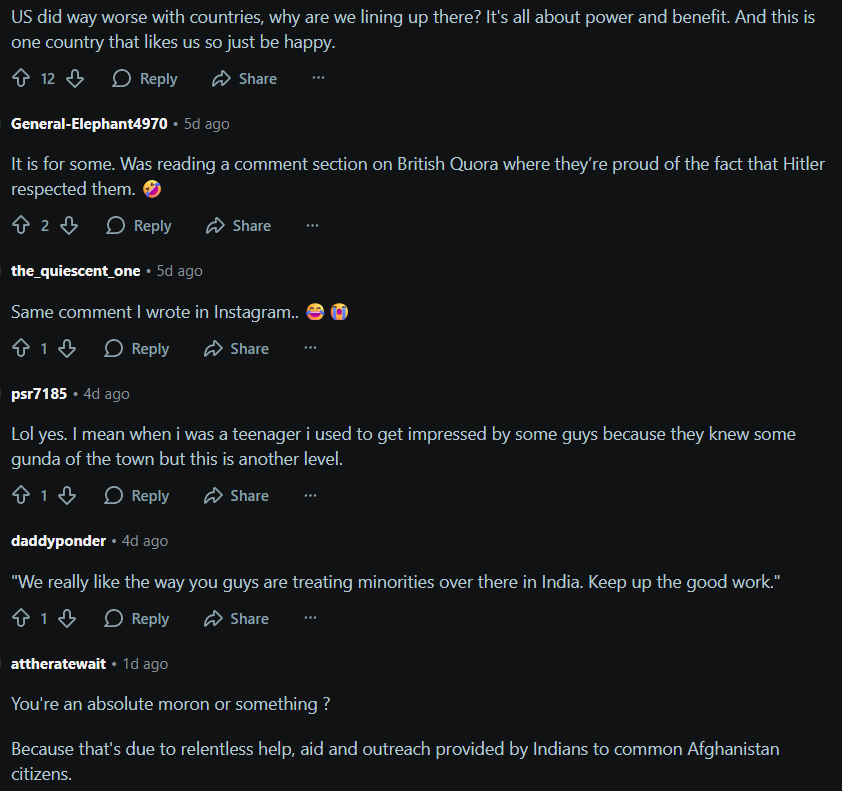

In [3]:
# Display uploaded images using PIL
from IPython.display import display

if not uploader.value:
    print("No image uploaded yet.")
else:
    for file_info in uploader.value:
        img_bytes = file_info['content']
        img = Image.open(BytesIO(img_bytes))
        print(f"Displaying: {file_info['name']}")
        display(img)



In [4]:
if not uploader.value:
    print("No image uploaded")
else:
    for file_info in uploader.value:
        img = Image.open(BytesIO(file_info['content']))
        extracted_text = pytesseract.image_to_string(img)
        cleaned_text = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+", "", extracted_text)
        cleaned_text = re.sub(r"[^A-Za-z0-9\s.,!?]", "", cleaned_text)
        print(f"📝 Text from {file_info['name']}:\n{extracted_text}\n")
        
        blob = TextBlob(extracted_text)
        sentiment = blob.sentiment.polarity
        scaled = ((sentiment + 1) / 2) * 100

        if scaled > 50:
            label = "Positive"
        elif scaled < 50:
            label = "Negative"
        else:
            label = "Neutral"

        print(f"Sentiment for {file_info['name']}: {label}")
        print(f"Polarity Score: {scaled}\n")


📝 Text from Screenshot 2025-10-14 171454.png:
The news channels are going to pick this up soon.

251 O Reply Q Award A Share

RevealApart2208 - 6h ago « Edited 39m ago

It is good. Media should highlight lack of empathy and lack of complete humanity in our workplaces.
What a pathetic state of work environment that current Indians should bear.

© G2 B OrRepy Q Award A Share
2 anantprsd5 » 3h ago

No they probably won't. It doesn't fit their agenda of GenZ workers are pathetic. Most boomers and
millenials currently are coping by bashing genz workers.

13 O Reply Q Award  @ Share
@® 1 more reply
@® 1 more reply
& Positively-Fleabag85 - 4h ag0
Inshorts pe toh definitely aayega
7&4 OReply Q Award A Share
\@ intPixel @ + 7h ago
2 @
O54 ORepy Q Award Share



Sentiment for Screenshot 2025-10-14 171454.png: Positive
Polarity Score: 53.18181818181819

📝 Text from Screenshot 2025-10-14 171946.png:
US did way worse with countries, why are we lining up there? It's all about power and benefit. And 

Device set to use cpu


sadness: 87.66%
neutral: 5.19%
surprise: 3.12%
fear: 1.21%
disgust: 1.05%
anger: 0.91%
joy: 0.86%


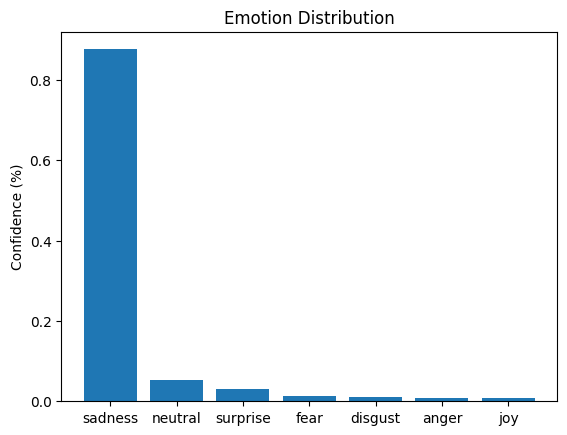

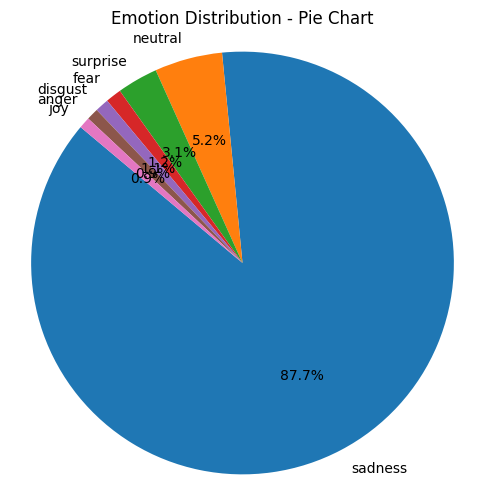

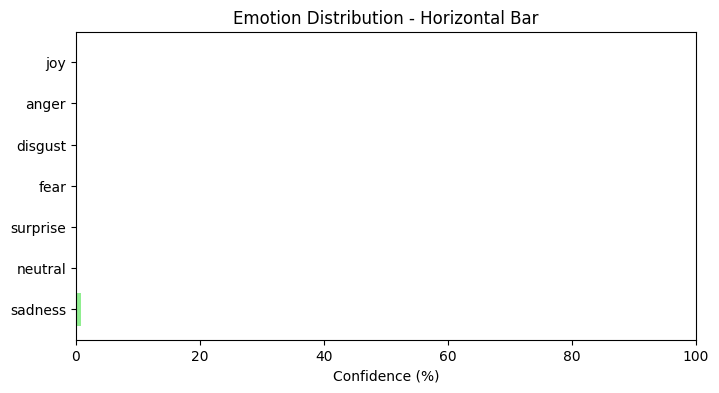

anger: 54.94%
neutral: 21.07%
disgust: 11.42%
surprise: 5.74%
sadness: 3.81%
fear: 2.31%
joy: 0.70%


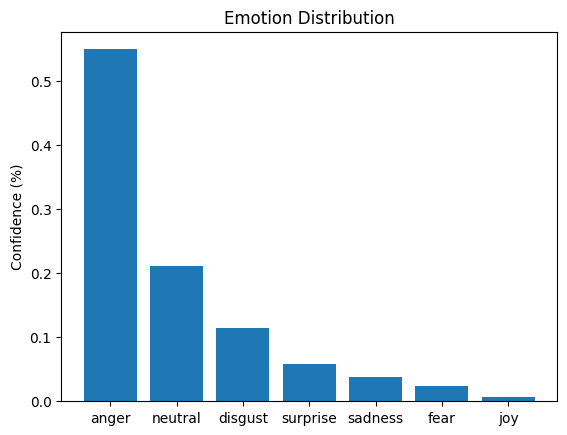

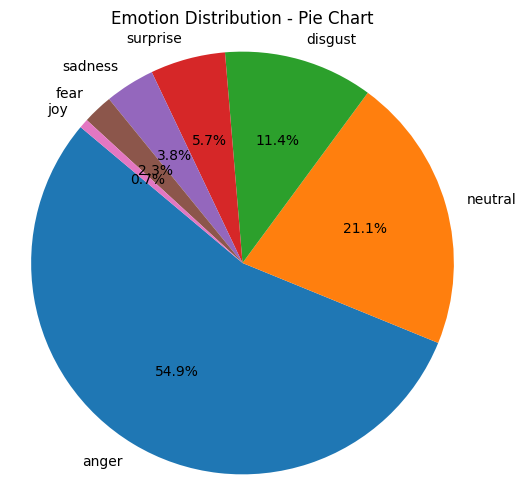

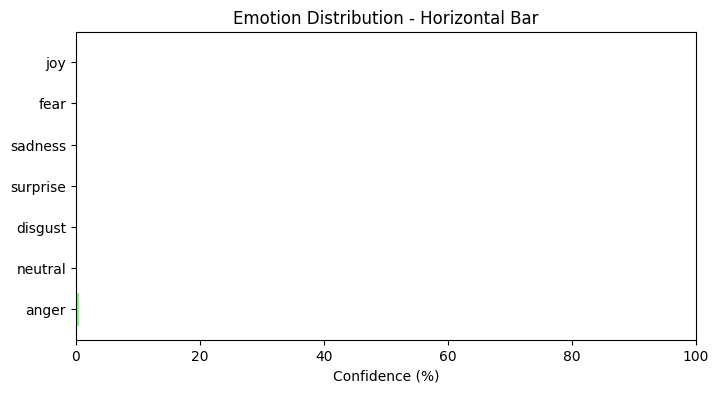

In [13]:
emotion_pipeline = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    top_k=None
)

if not uploader.value:
    print("No image uploaded")
else:
    for file_info in uploader.value:
        img = Image.open(BytesIO(file_info['content']))
        extracted_text = pytesseract.image_to_string(img)
        
        blob = TextBlob(extracted_text)
        sentiment = blob.sentiment.polarity

        if not isinstance(extracted_text, str) or extracted_text.strip() == "":
            print("❌ No text detected in the image.")
        else:
            result = emotion_pipeline(extracted_text)[0]
            for r in result:
                print(f"{r['label']}: {r['score']*100:.2f}%")

        labels = [r['label'] for r in result]
        scores = [r['score'] for r in result]
        
        plt.bar(labels, scores)
        plt.ylabel('Confidence (%)')
        plt.title('Emotion Distribution')
        plt.show()

        # 2. Pie chart
        labels = [r['label'] for r in result]
        scores = [r['score'] for r in result]
        
        plt.figure(figsize=(6, 6))
        plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title('Emotion Distribution - Pie Chart')
        plt.axis('equal')
        plt.show()

